In [54]:
import pandas as pd
import numpy as np
import os
import pickle_funcs as pk
import helpers
from matplotlib import pyplot
import sqlite3
out_path = "C:/Users/dasen/Google Drive/SYNC TO PC/"
downloads = "C:/Users/dasen/Downloads/"

# Description

Exploration and setup of data for [kaggle project.](https://www.kaggle.com/c/zillow-prize-1/data)

I want to create a database for this project so that all data can be in a centralized location.

# Load Data

In [55]:
# load pre prepared list of columns to include in data 
cols = pd.read_excel(out_path + 'DATA-998 - variable decisions - 9-16-2017.xlsx')
cols = list(cols[cols.keep == 't']['feature'])

In [56]:
# load the transaction data 
query = """
    select 
    train.parcelid, train.logerror, train.transactiondate,
    %s
    from train
    inner join properties on properties.parcelid = train.parcelid
""" % str(", ".join(cols))
df = helpers.query_database(query)
df.index = df.parcelid

In [59]:
df.head(20)

parcelid  logerror transactiondate  bathroomcnt  bedroomcnt    fips  \
parcelid                                                                        
11016594  11016594    0.0276      2016-01-01          2.0         3.0  6037.0   
14366692  14366692   -0.1684      2016-01-01          3.5         4.0  6059.0   
12098116  12098116   -0.0040      2016-01-01          3.0         2.0  6037.0   
12643413  12643413    0.0218      2016-01-02          2.0         2.0  6037.0   
14432541  14432541   -0.0050      2016-01-02          2.5         4.0  6059.0   
11509835  11509835   -0.2705      2016-01-02          4.0         4.0  6037.0   
12286022  12286022    0.0440      2016-01-02          1.0         2.0  6037.0   
17177301  17177301    0.1638      2016-01-02          2.5         3.0  6111.0   
14739064  14739064   -0.0030      2016-01-02          1.0         2.0  6059.0   
14677559  14677559    0.0843      2016-01-03          2.0         2.0  6059.0   
10854446  10854446    0.3825      2016-01-03          2.0         2.0  6037.0   
11672170  11672170   -0.0161      2016-01-03          4.0         5.0  6037.0   
10949761  10949761    0.0344      2016-01-03          2.0         3.0  6037.0   
14665244  14665244    0.0816      2016-01-03          2.0         2.0  6059.0   
14148540  14148540   -0.0450      2016-01-03          2.0         2.0  6059.0   
14057104  14057104    0.0020      2016-01-03          2.0         3.0  6059.0   
17296797  17296797    0.0440      2016-01-03          2.5         3.0  6111.0   
12524288  12524288   -0.0419      2016-01-03          1.0         1.0  6037.0   
14091502  14091502   -0.0020      2016-01-03          2.0         3.0  6059.0   
10815909  10815909    0.0100      2016-01-03          3.0         3.0  6037.0   

            latitude    longitude  threequarterbathnbr  pooltypeid7  \
parcelid                                                              
11016594  34280990.0 -118488536.0                  NaN          NaN   
14366692  33668120.0 -117677556.0                  1.0          NaN   
12098116  34136312.0 -118175032.0                  NaN          NaN   
12643413  33755800.0 -118309000.0                  NaN          NaN   
14432541  33485643.0 -117700234.0                  1.0          1.0   
11509835  33870089.0 -118402768.0                  NaN          NaN   
12286022  33899475.0 -118212720.0                  NaN          NaN   
17177301  34207204.0 -119165589.0                  1.0          NaN   
14739064  33549600.0 -117678000.0                  NaN          NaN   
14677559  33612700.0 -117742000.0                  NaN          NaN   
10854446  34164671.0 -118477995.0                  NaN          NaN   
11672170  34072220.0 -118547322.0                  NaN          NaN   
10949761  34189804.0 -118339183.0                  NaN          NaN   
14665244  33670900.0 -117844000.0                  NaN          NaN   
14148540  33913333.0 -117914140.0                  NaN          NaN   
14057104  33676787.0 -117950591.0                  NaN          NaN   
17296797  34176362.0 -118757591.0                  1.0          NaN   
12524288  33776400.0 -118123000.0                  NaN          1.0   
14091502  33770148.0 -118021281.0                  NaN          NaN   
10815909  34164085.0 -118528595.0                  NaN          NaN   

            ...      fullbathcnt  yearbuilt  calculatedfinishedsquarefeet  \
parcelid    ...                                                             
11016594    ...              2.0     1959.0                        1684.0   
14366692    ...              3.0     2014.0                        2263.0   
12098116    ...              3.0     1940.0                        2217.0   
12643413    ...              2.0     1987.0                         839.0   
14432541    ...              2.0     1981.0                        2283.0   
11509835    ...              4.0     1982.0                        3067.0   
12286022    ...              1.0     1939.0     

# View distribution of logerror

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


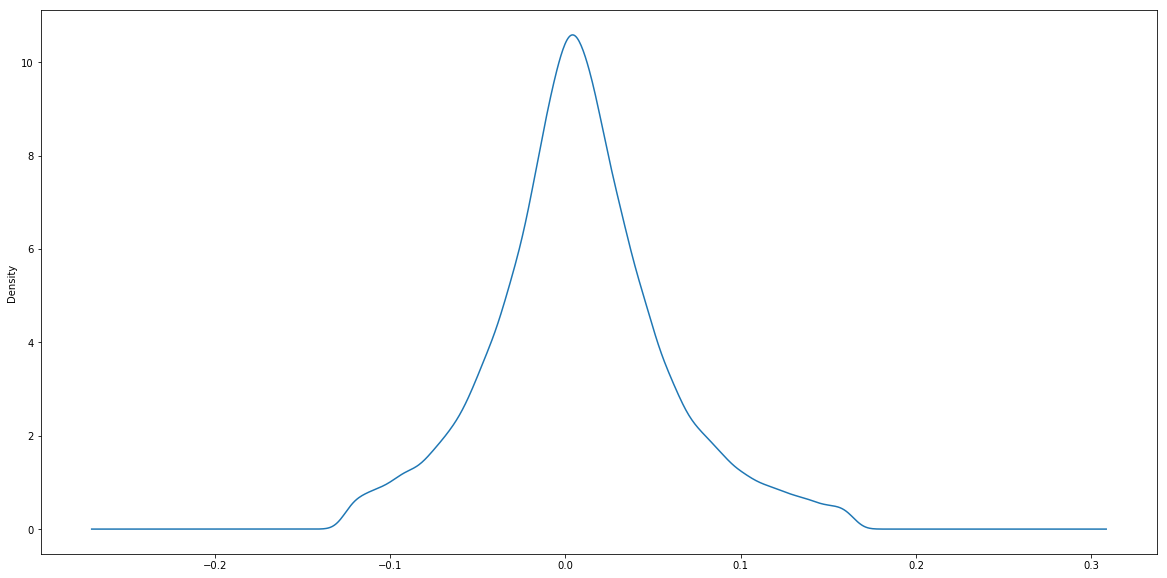

In [57]:
# view distribution of logerror
print(df.logerror.describe())
mask1 = (df.logerror < np.percentile(df.logerror, 95))
mask2 = (df.logerror > np.percentile(df.logerror, 5))
df[mask1 & mask2].logerror.plot(
    kind = 'density',
    figsize = (20, 10)
)
pyplot.show()